# File Input and Output  

1. How are files stored?  
2. Reading a text file, line-by-line   
    * File Object
    * Lists from files
    * Dictionaries from files
3. Exercises:
    * GDP per capita
    * Big Mac Index
4. Writing a text file
5. Other Tools for Python File I/O  
----------


## first, make sure you are in the right directory

you should see econ_data.txt and README.txt

In [6]:
%%sh
pwd

/Users/snorlax13mba/UNIVERSE/WK/Software_Carpentry/Bootcamps/NBER_2015-01/Lessons/2_py_reading_files


In [7]:
%%sh
ls

A_Loops_and_Functions
B_File_Io
File_IO.ipynb
README.txt
Reading_Files_in_Python_TC.ipynb
big_mac.csv
econ_data.txt
gdp_per_capita.csv
images
my_eco_tools.py
my_eco_tools.pyc


In [8]:
%%bash
cat econ_data.txt

country,country_code,gdp_usd,pop,fx_per_usd,currency_code,currency_name,big_mac_local_price
Argentina,ARG,609.9,43132,8.1688,ARS,Argentine peso,21.00
Australia,AUS,1560.4,23714,1.0594,AUD,Australian dollar,5.10
Austria,AUT,428.3,8527,0.7427,EUR,Euro,3.39
Belgium,BEL,524.8,11233,0.7427,EUR,Euro,3.70
Brazil,BRA,2245.7,203663,2.2203,BRL,Brazilian real,13.00
United Kingdom,GBR,2678.5,64106,0.5868,GBP,British pound[C],2.89
Canada,CAN,1826.8,35676,1.0741,CAD,Canadian dollar,5.64
Chile,CHL,277.2,18006,564.1400,CLP,Chilean peso,2100.00
China,CHN,9240.3,1367400,6.1983,CNY,Chinese yuan,16.90
Colombia,COL,378.4,47931,1847.6500,COP,Colombian peso,8600.00
Costa Rica,CRI,49.6,4773,537.3000,CRC,Costa Rican colon,2150.00
Czech Republic,CZE,208.8,10522,20.3877,CZK,Czech koruna,70.45
Denmark,DNK,335.9,5656,5.5388,DKK,Danish krone,28.50
Egypt,EGY,272.0,87758,7.1501,EGP,Egyptian pound,16.93
Estonia,EST,24.9,1316,0.7427,EUR,Euro,2.90
Finland,FIN,267.3,5472,0.7427,EUR,Euro,4.10
France,FRA,2806.4,66078,0.742

In [9]:
%%sh
# how many lines are there in the file?
wc -l econ_data.txt

      57 econ_data.txt


In [10]:
%%bash
# how many individual currencies are there?
cut -d "," -f 6 econ_data.txt | sort | uniq -c | wc -l

      46


# 1. How are files stored?  

## Binary Encoding of Text

A simple plain text file that contains the plain-text string "NBER Bootcamp." is stored in 15 bytes as:   
![nber_image](./images/nber.png)

### Some resources  

* Wikipedia: [ASCII](https://en.wikipedia.org/wiki/Ascii)
* [ The Absolute Minimum Every Software Developer Absolutely, Positively Must Know About Unicode and Character Sets (No Excuses!)](http://www.joelonsoftware.com/articles/Unicode.html)

### Occasional Pain Point: `\n` versus `\r\n`  

* `\n` = New Line
    * In most  Unix systems including Mac OSX, `\n` is the standard line terminator for text files  
    * The non-printable value, 0101 1100, will occupy the byte that signifies the new line marker
* `\r` = Carriage Return
    * Windows text files typically terminate lines with the sequence `\r\n`
    * Whle Python does its best to insulate you from having to keep track of `\n` versus `\r\n`, you may come across situations where the presence of Carriage Return characters is an issue.
    
    
### Where does "Return" come from anyway? 

![CRLF](images/02_CRLF.png)
    
    

## Common Plain-Text file types

* Text (.txt)
* Comma-Separated Values (.csv)
    * Most spreadsheets allow for export of .csv files
    * Common way of sharing "Flat" flies (one row = one observation)
    * Many possible variations: headers, row names, separator characters, quotes, etc.
* Space-padded, tab-delimited (`\t`), etc.
* Source code, HTML, "Natural Language," XML, JSON, Yaml, etc. etc.

## Files with Other Binary Encodings  

* Documents: databases (many open and proprietary formats), .pdf, .doc, .xls, etc.
* Images: .jpg, .png, many other formats
* Audio: mp3, ogg, etc.
* Data from sensors, repeated measures, archaic formats, etc.

## The Point: 

* Find out what format your input data is in
* To the extent possible, look at your data
    * Unix utilities: `cat`, `less` `head`, `tail`, `wc`, etc.
* Test your expectations
* Decide how to handle missing data and "bad" data (JTPA)
    * Big subjects, not covered today
* Allow plenty of time for dealing with file format ideosyncracies and conversions


# 2. Reading a text file, line-by-line   

* Look at the data
* Read into a File Object
* Create a List from the File
* Create a Dictionary from File


### Economic Data dataset

`econ_data.txt`

> Question of interest: Which country has the largest GDP per capita? And the smallest?  

> Alternate question of interest: What is the price of a Big Mac in USD?

### Examine the data

> Here we use the iPython Notebook "magics" to call the shell. You can also just do this from the command line

* Look at the data
* Read the docs

In [11]:
%%bash
ls

A_Loops_and_Functions
B_File_Io
File_IO.ipynb
README.txt
Reading_Files_in_Python_TC.ipynb
big_mac.csv
econ_data.txt
gdp_per_capita.csv
images
my_eco_tools.py
my_eco_tools.pyc


In [12]:
%%sh
# read README.txt
cat README.txt

econ_data.txt dataset description

Selected Economic Data for 56 Countries, December 2013

Variables

country : Name of country
country_code : Three character country code
gdp_usd : Gross Domestic Product, equivalent USD billion
pop : Population, thousand
fx_per_usd : Foreign exchange rate in FX units per US Dollar
currency_code : Three character code for local currency
currency_name : Name of local currency
big_mac_local_price : Price of a Big Mac, denominated in local currency


Sources

* The Economist "The Big Mac index" http://www.economist.com/content/big-mac-index

* World Bank

* Wikipedia



In [13]:
%%bash
wc econ_data.txt
# what does the output mean?  call: man wc

      57     123    3288 econ_data.txt


In [14]:
%%bash
head econ_data.txt

country,country_code,gdp_usd,pop,fx_per_usd,currency_code,currency_name,big_mac_local_price
Argentina,ARG,609.9,43132,8.1688,ARS,Argentine peso,21.00
Australia,AUS,1560.4,23714,1.0594,AUD,Australian dollar,5.10
Austria,AUT,428.3,8527,0.7427,EUR,Euro,3.39
Belgium,BEL,524.8,11233,0.7427,EUR,Euro,3.70
Brazil,BRA,2245.7,203663,2.2203,BRL,Brazilian real,13.00
United Kingdom,GBR,2678.5,64106,0.5868,GBP,British pound[C],2.89
Canada,CAN,1826.8,35676,1.0741,CAD,Canadian dollar,5.64
Chile,CHL,277.2,18006,564.1400,CLP,Chilean peso,2100.00
China,CHN,9240.3,1367400,6.1983,CNY,Chinese yuan,16.90


### Read the data into a file object

* two approaches

In [15]:
# For convenience, assign the path and file name to variables

read_this = 'econ_data.txt'
print read_this

econ_data.txt


In [16]:
# Approach 1: open, read, close
file_in = open(read_this, 'r')
all_lines = file_in.readlines()
file_in.close()                   # important to close the file

#### Some properties of the file that was read

In [17]:
print "Name of the file: ", file_in.name
print "Is File Closed? : ", file_in.closed
print "Opening mode : ", file_in.mode


Name of the file:  econ_data.txt
Is File Closed? :  True
Opening mode :  r


### Another way to read a file: python `with()` 

* This approach is better and safer because it will automatically close the file after reading it

In [18]:
with open(read_this, 'r') as file_in:
    lines = file_in.readlines()
    # file_in.close()

In [19]:
type(lines)

list

In [20]:
lines[0:5]

['country,country_code,gdp_usd,pop,fx_per_usd,currency_code,currency_name,big_mac_local_price\r\n',
 'Argentina,ARG,609.9,43132,8.1688,ARS,Argentine peso,21.00\r\n',
 'Australia,AUS,1560.4,23714,1.0594,AUD,Australian dollar,5.10\r\n',
 'Austria,AUT,428.3,8527,0.7427,EUR,Euro,3.39\r\n',
 'Belgium,BEL,524.8,11233,0.7427,EUR,Euro,3.70\r\n']

In [21]:
# print each individual line -- iterate over the file
for l in lines:
    print l

country,country_code,gdp_usd,pop,fx_per_usd,currency_code,currency_name,big_mac_local_price

Argentina,ARG,609.9,43132,8.1688,ARS,Argentine peso,21.00

Australia,AUS,1560.4,23714,1.0594,AUD,Australian dollar,5.10

Austria,AUT,428.3,8527,0.7427,EUR,Euro,3.39

Belgium,BEL,524.8,11233,0.7427,EUR,Euro,3.70

Brazil,BRA,2245.7,203663,2.2203,BRL,Brazilian real,13.00

United Kingdom,GBR,2678.5,64106,0.5868,GBP,British pound[C],2.89

Canada,CAN,1826.8,35676,1.0741,CAD,Canadian dollar,5.64

Chile,CHL,277.2,18006,564.1400,CLP,Chilean peso,2100.00

China,CHN,9240.3,1367400,6.1983,CNY,Chinese yuan,16.90

Colombia,COL,378.4,47931,1847.6500,COP,Colombian peso,8600.00

Costa Rica,CRI,49.6,4773,537.3000,CRC,Costa Rican colon,2150.00

Czech Republic,CZE,208.8,10522,20.3877,CZK,Czech koruna,70.45

Denmark,DNK,335.9,5656,5.5388,DKK,Danish krone,28.50

Egypt,EGY,272.0,87758,7.1501,EGP,Egyptian pound,16.93

Estonia,EST,24.9,1316,0.7427,EUR,Euro,2.90

Finland,FIN,267.3,5472,0.7427,EUR,Euro,4.10

France,FRA,2

`repr` := representation of the line, revealing hidden characters like \r\n line terminators

In [22]:
for line in lines:
    print repr(line)

'country,country_code,gdp_usd,pop,fx_per_usd,currency_code,currency_name,big_mac_local_price\r\n'
'Argentina,ARG,609.9,43132,8.1688,ARS,Argentine peso,21.00\r\n'
'Australia,AUS,1560.4,23714,1.0594,AUD,Australian dollar,5.10\r\n'
'Austria,AUT,428.3,8527,0.7427,EUR,Euro,3.39\r\n'
'Belgium,BEL,524.8,11233,0.7427,EUR,Euro,3.70\r\n'
'Brazil,BRA,2245.7,203663,2.2203,BRL,Brazilian real,13.00\r\n'
'United Kingdom,GBR,2678.5,64106,0.5868,GBP,British pound[C],2.89\r\n'
'Canada,CAN,1826.8,35676,1.0741,CAD,Canadian dollar,5.64\r\n'
'Chile,CHL,277.2,18006,564.1400,CLP,Chilean peso,2100.00\r\n'
'China,CHN,9240.3,1367400,6.1983,CNY,Chinese yuan,16.90\r\n'
'Colombia,COL,378.4,47931,1847.6500,COP,Colombian peso,8600.00\r\n'
'Costa Rica,CRI,49.6,4773,537.3000,CRC,Costa Rican colon,2150.00\r\n'
'Czech Republic,CZE,208.8,10522,20.3877,CZK,Czech koruna,70.45\r\n'
'Denmark,DNK,335.9,5656,5.5388,DKK,Danish krone,28.50\r\n'
'Egypt,EGY,272.0,87758,7.1501,EGP,Egyptian pound,16.93\r\n'
'Estonia,EST,24.9,1316,0.7

### Splitting Up Each Line: From a `String` to a `List`

In [23]:
some_line = lines[2]
print some_line


Australia,AUS,1560.4,23714,1.0594,AUD,Australian dollar,5.10



In [24]:
some_line[0]

'A'

In [25]:
type(some_line)

str

In [26]:
# What is the first element of some_line?
some_line[0]

# is that what you expected?

'A'

In [27]:
for _ in some_line:
    print _

A
u
s
t
r
a
l
i
a
,
A
U
S
,
1
5
6
0
.
4
,
2
3
7
1
4
,
1
.
0
5
9
4
,
A
U
D
,
A
u
s
t
r
a
l
i
a
n
 
d
o
l
l
a
r
,
5
.
1
0





In [28]:
print type(some_line)

<type 'str'>


#### Identifying variables using the comma delimiters

In [29]:
line_split_at_commas = some_line.split(",")  # forms a python List object, splitting at the comma characters
print line_split_at_commas

['Australia', 'AUS', '1560.4', '23714', '1.0594', 'AUD', 'Australian dollar', '5.10\r\n']


Still have line terminator invisible characters at the end.

In [30]:
print some_line.strip()        # gets rid of whitespace... 
# print type(some_line.strip())  # though result is still a string

Australia,AUS,1560.4,23714,1.0594,AUD,Australian dollar,5.10


In [31]:
my_new_line = some_line.strip()
print my_new_line[0]

A


In [32]:
line_list = some_line.strip().split(",")
print line_list

['Australia', 'AUS', '1560.4', '23714', '1.0594', 'AUD', 'Australian dollar', '5.10']


In [33]:
for l in line_list:
    print l

Australia
AUS
1560.4
23714
1.0594
AUD
Australian dollar
5.10


CAUTION: they look like numbers, but they are still strings

In [34]:
print 3 + 3

6


In [35]:
print '3' + '3'

33


## Multiple assignment trick: list unpacking

In [36]:

country, country_code, gdp_usd, pop, fx, curr_code, curr_name, big_mac = line_list

print "Country = ", country
print "GDP in USD bn =", float(gdp_usd)
print "Population mm =", float(pop)

Country =  Australia
GDP in USD bn = 1560.4
Population mm = 23714.0


## 3. Exercise: Calculate GDP Per Capita (or, Big Mac index, if you prefer)

Procedure

* Read econ_data.txt into a file object
* Calculate GDP / Population ratio
    * pay attention to integer arithmetic issues
* Print ratio for each country
* Find min and max.
* Do your results make sense?

* __Bonus 1__: 
    * Create variables to keep track of min and max
    * Just print the country with the max and the country with the min

* __Bonus 2__:
    * Find average ratio


## pseudo-code

1. read the file into a LIST!!!!!!!  here it happens to be called "lines"
2. for item in lines:
3.   clean up the item. i,e., convert the item from a string into a NEW list
4.   figure out which elements are the numbers you want
5.   take the relevant ratio 
6.   print the country name and the ratio

In [37]:
# List-based solution
with open(read_this, 'r') as file_in:
    lines = file_in.readlines()
    
ratios = []
for line in lines:
    clean_line = line.strip().split(',')
    country, country_code, gdp_usd, pop, fx, curr_code, curr_name, big_mac = clean_line
    if country == "country":
        pass     # skip the header line
    else:
        ratio = (1e6 * float(gdp_usd)) / (float(pop))
        print "Country=",country, "\tratio=", ratio
        ratios.append([country, ratio])

Country= Argentina 	ratio= 14140.3134564
Country= Australia 	ratio= 65800.7927806
Country= Austria 	ratio= 50228.6853524
Country= Belgium 	ratio= 46719.4872251
Country= Brazil 	ratio= 11026.5487595
Country= United Kingdom 	ratio= 41782.3604655
Country= Canada 	ratio= 51205.2920731
Country= Chile 	ratio= 15394.8683772
Country= China 	ratio= 6757.56910926
Country= Colombia 	ratio= 7894.68193862
Country= Costa Rica 	ratio= 10391.787136
Country= Czech Republic 	ratio= 19844.1360958
Country= Denmark 	ratio= 59388.2602546
Country= Egypt 	ratio= 3099.43253037
Country= Estonia 	ratio= 18920.9726444
Country= Finland 	ratio= 48848.6842105
Country= France 	ratio= 42471.0190986
Country= Germany 	ratio= 46176.7946226
Country= Greece 	ratio= 22032.2023106
Country= Hong Kong 	ratio= 37871.4581894
Country= Hungary 	ratio= 13503.3910315
Country= India 	ratio= 1483.98829762
Country= Indonesia 	ratio= 3398.93995976
Country= Ireland 	ratio= 50347.0715835
Country= Israel 	ratio= 35028.9296046
Country= Ital

In [38]:
# dictionary-based solution
with open(read_this, 'r') as file_in:
    lines = file_in.readlines()
    
bigmac_dict = {} # empty dictionary
for line in lines:
    clean_line = line.strip().split(',')
    country, country_code, gdp_usd, pop, fx, curr_code, curr_name, big_mac = clean_line
    if country == "country":
        pass     # skip the header line
    else:
        bigmac_dict[country] = float(big_mac) / (float(fx))  # WATCH parentheses and order of operations


In [39]:
print bigmac_dict

{'Brazil': 5.8550646309057335, 'Canada': 5.250907736709803, 'Italy': 5.183788878416588, 'Czech Republic': 3.455514844734816, 'Lithuania': 3.489822974342977, 'Costa Rica': 4.001488926112042, 'France': 5.251110811902517, 'Netherlands': 4.64521341052915, 'Ireland': 4.699070957317894, 'Argentina': 2.5707570267358735, 'Norway': 7.757826515604545, 'Thailand': 3.1151667715544367, 'Israel': 5.126252270197433, 'Australia': 4.814045686237493, 'Singapore': 3.796445880452343, 'Turkey': 4.42308611868216, 'Venezuela': 6.818181818181818, 'China': 2.7265540551441525, 'Chile': 3.7224802354025597, 'Belgium': 4.981823077958799, 'Germany': 4.941429917867241, 'Hong Kong': 2.4256499580672215, 'Poland': 2.9953767011786154, 'Spain': 4.914501144472869, 'Ukraine': 1.6260162601626016, 'Indonesia': 2.4284224250325943, 'Taiwan': 2.634914281902475, 'Denmark': 5.14551888495703, 'Philippines': 3.703275083902326, 'Finland': 5.520398545846236, 'Saudi Arabia': 2.9330204778157, 'United States': 4.8, 'Sweden': 5.953774136

In [40]:
print bigmac_dict.keys()

['Brazil', 'Canada', 'Italy', 'Czech Republic', 'Lithuania', 'Costa Rica', 'France', 'Netherlands', 'Ireland', 'Argentina', 'Norway', 'Thailand', 'Israel', 'Australia', 'Singapore', 'Turkey', 'Venezuela', 'China', 'Chile', 'Belgium', 'Germany', 'Hong Kong', 'Poland', 'Spain', 'Ukraine', 'Indonesia', 'Taiwan', 'Denmark', 'Philippines', 'Finland', 'Saudi Arabia', 'United States', 'Sweden', 'Uruguay', 'Japan', 'Switzerland', 'New Zealand', 'Russia', 'Pakistan', 'Portugal', 'Estonia', 'Mexico', 'Egypt', 'UAE', 'South Africa', 'India', 'Peru', 'United Kingdom', 'Malaysia', 'Austria', 'Vietnam', 'Colombia', 'Greece', 'Sri Lanka', 'Hungary', 'South Korea']


In [41]:
print bigmac_dict.values()

[5.8550646309057335, 5.250907736709803, 5.183788878416588, 3.455514844734816, 3.489822974342977, 4.001488926112042, 5.251110811902517, 4.64521341052915, 4.699070957317894, 2.5707570267358735, 7.757826515604545, 3.1151667715544367, 5.126252270197433, 4.814045686237493, 3.796445880452343, 4.42308611868216, 6.818181818181818, 2.7265540551441525, 3.7224802354025597, 4.981823077958799, 4.941429917867241, 2.4256499580672215, 2.9953767011786154, 4.914501144472869, 1.6260162601626016, 2.4284224250325943, 2.634914281902475, 5.14551888495703, 3.703275083902326, 5.520398545846236, 2.9330204778157, 4.8, 5.953774136922177, 4.919460165433174, 3.644243080862799, 6.826241134751774, 4.944911945866227, 2.554733001696458, 3.0401297122010535, 4.039316009155783, 3.9046721421839234, 3.247606823067287, 2.367799051761514, 3.5392447796139503, 2.330115554710162, 1.7474138275352478, 3.586800573888092, 4.925017041581459, 2.408839779005525, 4.564427090346035, 2.826189354686764, 4.654561199361351, 4.106637942641712

In [42]:
print (bigmac_dict['United States'])

4.8


#### Accessing dictionary elements - the safe way and the unsafe way

In [43]:
phony = "Fredonia"

In [44]:
print bigmac_dict[phony]

KeyError: 'Fredonia'

In [45]:
print bigmac_dict.get(phony)

None


In [46]:
# using the dictionary like a database
my_study_subjects = ['Peru', 'Turkey', 'UAE']
for subj in my_study_subjects:
    print subj, "\t", (bigmac_dict[subj])

Peru 	3.58680057389
Turkey 	4.42308611868
UAE 	3.53924477961


In [47]:
for subj in my_study_subjects:
    print subj, "\t", "{:0.2f}".format(bigmac_dict[subj])
    # print("{:.2f}".format(3.1415926));

Peru 	3.59
Turkey 	4.42
UAE 	3.54


Python number format resources
http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python
http://www.python-course.eu/python3_formatted_output.php

# 4. Writing a text file

* Suppose we want to save our calculated brain-to-body ratios

In [48]:
file_out_name = 'Animal_brain_to_body_ratio.txt'
file_out = open(file_out_name, 'w')
for r in ratios:
    line_out = r[0] + ", " + str(r[1]) + "\n"
    file_out.write(line_out)
file_out.close()

# 5. Other Tools for Reading and Writing Files  

## `csv` module

* somewhat more "helpful" way of reading and writing flat files
* [official documentation](https://docs.python.org/2/library/csv.html)

## <font color=green>pandas</font> 

* Beyond file i/o, a powerful set of full-fledged "Data Wrangling" tools for python
* cross-sectional, time-series
* Intro video at <http://vimeo.com/59324550>
* Book info: <http://shop.oreilly.com/product/0636920023784.do>


In [49]:
import pandas as pd

In [50]:
eco_df = pd.read_csv("econ_data.txt", index_col=0)

In [51]:
eco_df.head()

,country_code,gdp_usd,pop,fx_per_usd,currency_code,currency_name,big_mac_local_price
country,,,,,,,
Argentina,ARG,609.9,43132,8.1688,ARS,Argentine peso,21.00
Australia,AUS,1560.4,23714,1.0594,AUD,Australian dollar,5.10
Austria,AUT,428.3,8527,0.7427,EUR,Euro,3.39
Belgium,BEL,524.8,11233,0.7427,EUR,Euro,3.70
Brazil,BRA,2245.7,203663,2.2203,BRL,Brazilian real,13.00


In [52]:
eco_df['bmi'] = eco_df.big_mac_local_price / eco_df.fx_per_usd

In [53]:
%matplotlib inline

In [54]:
big_mac = eco_df['bmi'].copy()
big_mac.sort()
big_mac.head()

country
Ukraine         1.626016
India           1.747414
South Africa    2.330116
Egypt           2.367799
Malaysia        2.408840
Name: bmi, dtype: float64

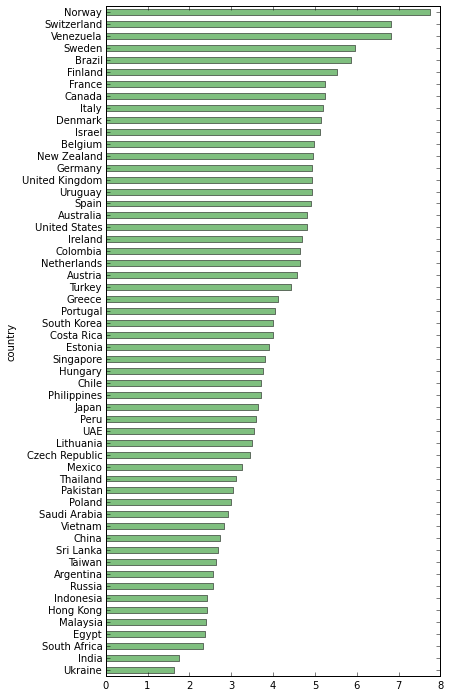

In [55]:
big_mac.plot(kind='barh', figsize=(6,12), color='Green', alpha=0.5)

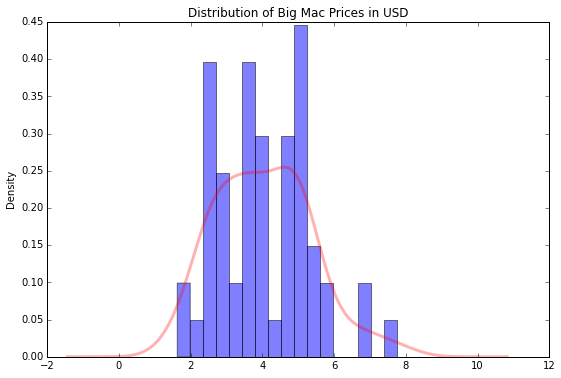

In [56]:
big_mac.hist(normed=True, bins=17, alpha=0.5)
big_mac.plot(kind='kde', linewidth=3, alpha=0.3, color="Red",
             title="Distribution of Big Mac Prices in USD",
             figsize = (9, 6))

# 6. Writing a Script

Scripting - i.e. writing and saving independent python scripts -- allows you to create, optimize, and reuse functions.

The code in the cell below can be saved to a text file and then imported by other python scripts.   

For example, if we save the code below to 'my_eco_tools.py'

In [57]:
"""
Read econ_data.txt and write out analytic results as follows.
(1) write two new comma-delimited files
    * gdp_per_capita.csv - GDP per capita by country
    * big_mac.csv - big mac price in USD by country
(2) create horizontal bar plots of the same as:
    * gdp_per_capita.png - GDP per capita by country
    * big_mac.png -  big mac price in USD by country
"""
import pandas as pd

def make_gdppc_and_bigmac_files(file_to_process):
    """Read file_to_process and create .csvs"""
    eco_df = pd.read_csv(file_to_process, index_col=0)
    gpdpc_df = pd.DataFrame(index=eco_df.index)
    bigmac_df = pd.DataFrame(index=eco_df.index)

    gpdpc_df['gdp_per_capita'] = 1e6 * eco_df.gdp_usd / map(float, eco_df['pop'])
    bigmac_df['big_mac_in_usd'] = eco_df.big_mac_local_price / eco_df.fx_per_usd

    gpdpc_df.to_csv('gdp_per_capita.csv')
    bigmac_df.to_csv('big_mac.csv')
    
def main():
    to_process = 'econ_data.txt'
    make_gdppc_and_bigmac_files(to_process)
    
if __name__ == '__main__':
    main()

In [58]:
from my_eco_tools import make_gdppc_and_bigmac_files as the_usual

In [59]:
the_usual('econ_data.txt')